## 2017 ATP Tour Ranking Predictions

### Introduction:

The Association of Tennis Professionals (ATP) is an official tennis governing body that holds an annual international tour in which the world’s professional male tennis players are able to showcase their skills and tenacity against various opponents from different countries  (Association of Tennis Professionals, 2019). Tournaments are held in many countries, and winning a match in these tournaments awards the victors points. Each week, the ATP updates the rankings of these players, adding the number of points gained within the 7-day period to the total points the player has garnered over the season.

As a result of the amount of tournaments held over a single season, shifts in rankings are fairly common. The goal of this project is to predict the rankings of these professional tennis players based on a number of variables. The focus of the following data analysis is on the 2017 ATP World Tour (Sackmann, 2017), which comprises of data gathered from tennis tournaments held between the period of January 2017 to November 2017. The data includes the names of winners and losers from every round of national and international tennis tournaments. Multiple statistics are included in this data, which aids us in the prediction of our question: how well do variables relating to player statuses, such as number of ace, first-serve wins, and number of double faults predict the ATP ranking of the tennis player in later seasons?

### Preliminary exploratory data analysis:

#### Downloading the dataset:

In [1]:
import pandas as pd

In [2]:
url = "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"
tennis_data = pd.read_csv(url)

tennis_data

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,...,54.0,42.0,22.0,15.0,11.0,15.0,6.0,3650.0,8.0,2975.0
6862,2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NaN,...,53.0,33.0,21.0,14.0,6.0,11.0,7.0,3775.0,18.0,2235.0
6863,2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NaN,...,54.0,30.0,12.0,12.0,5.0,11.0,15.0,2320.0,76.0,667.0
6864,2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NaN,...,54.0,44.0,13.0,14.0,7.0,10.0,7.0,3775.0,15.0,2320.0


#### Filtering the Dataset:

In this step, we want to filter the original tennis dataset to only include games held in 2017.

In [13]:
tennis_data_2017 = tennis_data[tennis_data["tourney_date"]//10000 == 2017]

tennis_data_2017

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
4906,0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,...,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
4907,1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,...,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
4908,2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,...,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0
4909,4,2017-M020,Brisbane,Hard,32,A,20170102,276,111442,NaN,...,43.0,23.0,13.0,9.0,10.0,15.0,79.0,689.0,160.0,372.0
4910,6,2017-M020,Brisbane,Hard,32,A,20170102,278,105777,7.0,...,36.0,21.0,7.0,8.0,4.0,8.0,17.0,2035.0,33.0,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,...,54.0,42.0,22.0,15.0,11.0,15.0,6.0,3650.0,8.0,2975.0
6862,2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NaN,...,53.0,33.0,21.0,14.0,6.0,11.0,7.0,3775.0,18.0,2235.0
6863,2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NaN,...,54.0,30.0,12.0,12.0,5.0,11.0,15.0,2320.0,76.0,667.0
6864,2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NaN,...,54.0,44.0,13.0,14.0,7.0,10.0,7.0,3775.0,15.0,2320.0


#### Grouping Players' Statistics by Winner's Name:

In this step, we used the groupby function to group the players' statistics by 'winner_name'. We also used the aggregate function to compute the mean of each predictor variables. Furthermore, we used the function dropna() to only have valid data

In [18]:
tennis_grouped = tennis_data_2017.groupby(['winner_name']).agg(
    {'winner_rank': 'mean', 'w_ace': 'mean', 'w_df': 'mean', 'w_svpt': 'mean', 'w_1stIn' :'mean', 'w_1stWon': 'mean'}
).agg(lambda x: round(x, 2))

tennis_grouped = tennis_grouped.dropna()

tennis_grouped

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon
winner_name,,,,,,
Adam Pavlasek,136.00,14.00,5.00,103.00,70.00,59.00
Adrian Mannarino,45.27,5.63,2.43,82.23,50.00,36.10
Adrian Menendez Maceiras,140.00,7.00,2.00,71.00,42.00,35.00
Akira Santillan,169.50,4.00,1.50,43.00,26.00,22.00
Albert Ramos,23.59,4.59,2.70,96.78,59.59,41.81
...,...,...,...,...,...,...
Yasutaka Uchiyama,230.00,5.00,1.00,48.00,31.00,25.00
Yoshihito Nishioka,81.86,1.57,1.57,74.14,45.57,31.57
Yuichi Sugita,54.79,3.42,1.84,68.47,43.37,31.84


In [19]:
import altair as alt
import numpy as np
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

#### Splitting the data:

In this step we will split the data to train set and test set using 75% of the data as our train model and 25% as test model.

In [20]:
tennis_train, tennis_test  = train_test_split(tennis_grouped, test_size=0.25, random_state=123)

tennis_train

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon
winner_name,,,,,,
Yoshihito Nishioka,81.86,1.57,1.57,74.14,45.57,31.57
Liam Broady,242.00,2.50,1.00,60.50,41.00,29.50
Jozef Kovalik,117.00,6.00,1.50,115.50,73.00,51.00
Joao Domingues,213.00,3.50,0.50,86.00,57.00,38.00
Thomas Fabbiano,78.00,2.33,6.00,105.67,69.33,46.33
...,...,...,...,...,...,...
Benoit Paire,43.62,8.54,3.58,73.96,40.50,31.62
Marcos Baghdatis,77.07,9.14,3.14,73.21,39.07,32.07
Hyeon Chung,73.00,4.00,3.26,72.37,44.16,34.16


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


X_train = pd.DataFrame(tennis_train.loc[:, ["w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon"]])
y_train = tennis_train["winner_rank"]

X_test = pd.DataFrame(tennis_test.loc[:, ["w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon"]])
y_test = tennis_test["winner_rank"]

#KNN Regression
tennis_pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor()),
    ]
)

tennis_cv = cross_validate(
    tennis_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True
)
np.random.seed(2023)

param_grid = {"knn__n_neighbors": range(1, 101, 1),}
tennis_tuned = GridSearchCV(estimator=tennis_pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_root_mean_squared_error")
tennis_results = pd.DataFrame(tennis_tuned.fit(X_train, y_train).cv_results_)

tennis_min = tennis_tuned.best_params_
tennis_best_RMSPE = -tennis_tuned.best_score_
print(tennis_min)
print("KNN Regression training RMSPE: " + str(tennis_best_RMSPE))

#Linear Regression
lm = LinearRegression()

tennis_fit = lm.fit(
   X_train, y_train
)


tennis_predictions = tennis_train.assign(
    predictions = tennis_fit.predict(X_train)
)
lm_rmse = np.sqrt(
    mean_squared_error(y_true=tennis_predictions["winner_rank"], y_pred=tennis_predictions["predictions"])
)


print("Linear Regression training RMSE: " + str(lm_rmse))



tennis_best_model = tennis_tuned.best_estimator_
tennis_prediction = tennis_best_model.predict(X_test)
tennis_summary = mean_squared_error(y_true=y_test, y_pred=tennis_prediction) ** (1 / 2)
print(tennis_summary)

{'knn__n_neighbors': 28}
KNN Regression training RMSPE: 98.54691350417515
Linear Regression training RMSE: 100.56993364029267
113.93974941256103


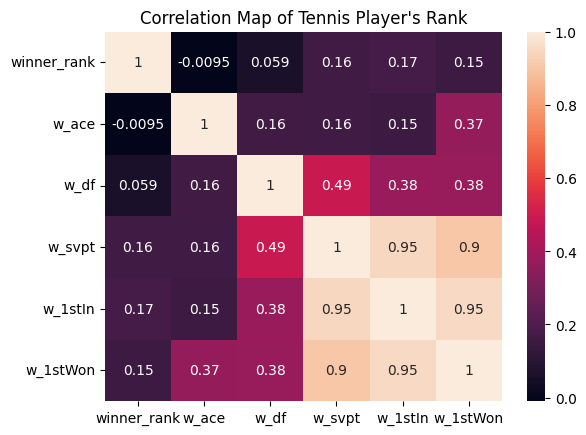

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = tennis_grouped.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Map of Tennis Player's Rank")
plt.show()

#### Visualizations:

Here is the relationship chart between the player's rank and our predictor variables.

In [31]:
tennis_chart_1st = (
    alt.Chart(tennis_train, title="Player's Rank VS Number of Aces")
    .mark_point(size=15)
    .encode(
        x=alt.X("w_ace", title="Number of Aces"),
        y=alt.Y("winner_rank", title="Player's rank", scale=alt.Scale(zero=False))
    )
)
tennis_chart_1st

alt.Chart(...)

In [32]:
tennis_chart_ace = (
    alt.Chart(tennis_train, title= "Player's Rank VS Number of Double Faults Made")
    .mark_point(size=15)
    .encode(
        x=alt.X("w_df", title="Number of Double Faults Made"),
        y=alt.Y("winner_rank", title="Player's rank", scale=alt.Scale(zero=False))
    )
)
tennis_chart_ace

alt.Chart(...)

In [33]:
tennis_chart_1st = (
    alt.Chart(tennis_train, title="Player's Rank VS Total Serve Points")
    .mark_point(size=15)
    .encode(
        x=alt.X("w_svpt", title="Total Serve Points"),
        y=alt.Y("winner_rank", title="Player's rank", scale=alt.Scale(zero=False))
    )
)
tennis_chart_1st

alt.Chart(...)

In [34]:
tennis_chart_1st = (
    alt.Chart(tennis_train, title="Player's Rank VS First Serve Made")
    .mark_point(size=15)
    .encode(
        x=alt.X("w_1stIn", title="First Serve Made"),
        y=alt.Y("winner_rank", title="Player's rank", scale=alt.Scale(zero=False))
    )
)
tennis_chart_1st

alt.Chart(...)

In [35]:
tennis_chart_1st = (
    alt.Chart(tennis_train, title="Player's Rank VS First Serve Percentage Win")
    .mark_point(size=15)
    .encode(
        x=alt.X("w_1stWon", title="Percentage of 1st serve win"),
        y=alt.Y("winner_rank", title="Player's rank", scale=alt.Scale(zero=False))
    )
)
tennis_chart_1st

alt.Chart(...)

### Methods:

During the preliminary exploratory data analysis, we first filtered out the tennis dataset to only contain tennis matches in 2017. This was done to limit the scope of this analysis. We then grouped each statistic to each winning player and summarized the mean statistics, further narrowed down the dataset to 5 predictor variables — neglecting match specifics as they do not have any relationship to the player’s ranking. The 5 predictor variables (number of aces, double faults, total serve points, first serve made, and first serve won) were chosen as they are reflective of a player's service game quality. According to the International Journal of Sports Physical Therapy, a player's service game is a key component and can be a major weapon for success in tennis (Myers et al., 2017).

For this project, we chose to compare the effectiveness of both the KNN-Regression and Linear Regression models to predict the target variable (ATP player rankings). The data was split into a 75% testing and a 25% training set. This decision to split the data into these proportions was to ensure that there was enough data for the testing set, without sacrificing the accuracy of the model with a large enough training set. 

For the KNN-Regression model, the 5 predictor variables were used to produce a pipeline. Once the pipeline was built, the K-value that optimized the RMSPE must be determined. To do this, we used GridSearchCV, a built-in functionality in scikit-learn, to tune our model and run cross-validation of 5 folds to determine the cross-validation accuracy. The optimum K-value was then determined by identifying the lowest corresponding RMSPE value (using the training set). 

For the Linear Regression model, we first fitted a linear regression model. Once fitted, we then proceeded with evaluating the RMSE on the training set to test the goodness of the fit.

Based on the RMSPE and RMSE values obtained, we then picked the KNN-Regression as the best model since it produced a lower RMSPE value than the Linear Regression model.

Finally, the test set was evaluated using the final K-value using the KNN-Regression model. Scatter plots were used to visualize the final KNN regression model of the predicted rankings (target variable) as a function of the various predictor variables.

### Discussion:

-> !!Sean to fill out

In paragraphs:

-summarize what you found (include limitations of the dataset and how to improve it, rationale behind the model chosen, and why we decided to conduct hyper parameter optimization)

-discuss whether this is what you expected to find?

-discuss what impact could such findings have?

-discuss what future questions could this lead to?

### Expected outcomes and significance:

Through this data analysis, we want to identify which of the predictor variables (number of aces, double faults, total serve points, first serve made, and first serve won) has the strongest correlation to our target variable (winner's rank). The findings derived from this analysis can be particularly interesting for aspiring professional tennis players to pinpoint which playing statistics should they focus more on. Moreover, this predictor can also be used to track the future career path of a player. 

#### References:

Association of Tennis Professionals. (2019). Official Site of Men’s Professional Tennis | ATP Tour | Tennis. ATP Tour. https://www.atptour.com/

Sackman, J. (2017). Statistics From the Top 500 Players Around the World: ATP Matches 2017. In GitHub.com. https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2017.csv

Myers, N. L., Kibler, W. B., Lamborn, L., Smith, B. J., English, T., Jacobs, C., & Uhl, T. L. (2017). Reliability and Validity of a BioMechanically Based Analysis Method for the Tennis serve. International Journal of Sports Physical Therapy, 12(3), 437–449.